In [71]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pickle import load
import os
import pandas as pd
import datetime

from eoles.write_output import comparison_simulations, plot_typical_week, plot_typical_demand, plot_residual_demand
from project.write_output import plot_compare_scenarios

# New runs

In [5]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Uniform": os.path.join("eoles/outputs/0828_S3_N1/0826_225609_uniform_S3_N1"),
               "Uniform 2y": os.path.join("eoles/outputs/0828_S3_N1/0828_004316_uniform_S3_N1_2y"),
               # "No subsidy heater": os.path.join("eoles/outputs/0429_080811_no_subsidy_heater_greenfield"),
               # "No subsidy insulation": os.path.join("eoles/outputs/0429_083155_no_subsidy_insulation_greenfield"),
               "Deep renovation": os.path.join("eoles/outputs/0828_S3_N1/0826_230609_GR_S3_N1"),
               "Deep renovation 2y": os.path.join("eoles/outputs/0828_S3_N1/0828_005742_GR_S3_N1_2y"),
               # "Global renovation low income": os.path.join("eoles/outputs/0504_greenfield_S3_N1/0505_085156_GR_low_income_greenfield_S3_N1"),
               # "Global renovation \n FGE": os.path.join("eoles/outputs/0510_S3_N1/0509_223231_GR_fge_S3_N1"),
               # "MWh_tCO2": os.path.join("eoles/outputs/0510_S3_N1/0509_221317_MWh_tCO2_S3_N1"),
               # "Proportional": os.path.join("eoles/outputs/0510_S3_N1/0511_035113_MWh_insulation_S3_N1"),
               "Insulation technical \n optimum": os.path.join("eoles/outputs/0828_S3_N1/0826_154702_centralized_insulation_S3_N1"),
               "Insulation technical \n optimum 2y": os.path.join("eoles/outputs/0828_S3_N1/0827_154945_centralized_insulation_S3_N1_2y"),
               # "MWh": os.path.join("eoles/outputs/0506_greenfield_S3_N1/0509_130427_MWh_insulation_greenfield_S3_N1"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0905_S3_N1")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Uniform", greenfield=True, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=True)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Uniform")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [8]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {# "Uniform": os.path.join("eoles/outputs/0828_S3_N1/0826_225609_uniform_S3_N1"),
               "Uniform 2y": os.path.join("eoles/outputs/0828_S3_N1/0828_004316_uniform_S3_N1_2y"),
               # "No subsidy heater": os.path.join("eoles/outputs/0429_080811_no_subsidy_heater_greenfield"),
               # "No subsidy insulation": os.path.join("eoles/outputs/0429_083155_no_subsidy_insulation_greenfield"),
               # "Deep renovation": os.path.join("eoles/outputs/0828_S3_N1/0826_230609_GR_S3_N1"),
               "Deep renovation 2y": os.path.join("eoles/outputs/0828_S3_N1/0828_005742_GR_S3_N1_2y"),
               # "Global renovation low income": os.path.join("eoles/outputs/0504_greenfield_S3_N1/0505_085156_GR_low_income_greenfield_S3_N1"),
               # "Global renovation \n FGE": os.path.join("eoles/outputs/0510_S3_N1/0509_223231_GR_fge_S3_N1"),
               # "MWh_tCO2": os.path.join("eoles/outputs/0510_S3_N1/0509_221317_MWh_tCO2_S3_N1"),
               # "Proportional": os.path.join("eoles/outputs/0510_S3_N1/0511_035113_MWh_insulation_S3_N1"),
               # "Insulation technical \n optimum": os.path.join("eoles/outputs/0828_S3_N1/0826_154702_centralized_insulation_S3_N1"),
               "Insulation technical \n optimum 2y": os.path.join("eoles/outputs/0828_S3_N1/0827_154945_centralized_insulation_S3_N1_2y"),
               # "MWh": os.path.join("eoles/outputs/0506_greenfield_S3_N1/0509_130427_MWh_insulation_greenfield_S3_N1"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0905_S3_N1_2y")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Uniform 2y", greenfield=True, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=True)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Uniform 2y")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

# Exogenous Res-IRF policies

In [168]:
# 0915
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/0915_policies_exogenous_scc/0915_111407_uniform_S2_N1_ref_scc"),
               "Restriction gas S2 N1": os.path.join("eoles/outputs/0915_policies_exogenous_scc/0915_113503_uniform_S2_N1_restrictiongas_scc"),
               "Ref S2p N1": os.path.join("eoles/outputs/0915_policies_exogenous_scc/0915_122722_uniform_S2p_N1_ref_scc"),
               "Restriction gas S2p N1": os.path.join("eoles/outputs/0915_policies_exogenous_scc/0915_124400_uniform_S2p_N1_restrictiongas_scc"),
               "Ref S3 N1": os.path.join("eoles/outputs/0915_policies_exogenous_scc/0915_133443_uniform_S3_N1_ref_scc"),
               "Restriction gas S3 N1": os.path.join("eoles/outputs/0915_policies_exogenous_scc/0915_135210_uniform_S3_N1_restrictiongas_scc"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0915_resirf_exogenous_scc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [26]:
# I add a carbon constraint instead of SCC

sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {# "Ref S2 N1": os.path.join("eoles/outputs/0915_policies_exogenous_cc/0915_153817_S2_N1_ref_cc"),
               "Restriction gas S2 N1": os.path.join("eoles/outputs/0915_policies_exogenous_cc/0915_155359_S2_N1_restrictiongas_cc"),
               # "Ref S2p N1": os.path.join("eoles/outputs/0915_policies_exogenous_cc/0915_162018_S2p_N1_ref_cc"),
               "Restriction gas S2p N1": os.path.join("eoles/outputs/0915_policies_exogenous_cc/0915_163703_S2p_N1_restrictiongas_cc"),
               # "Ref S3 N1": os.path.join("eoles/outputs/0915_policies_exogenous_cc/0915_170347_S3_N1_ref_cc"),
               "Restriction gas S3 N1": os.path.join("eoles/outputs/0915_policies_exogenous_cc/0915_172002_S3_N1_restrictiongas_cc"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0915_resirf_exogenous_cc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Restriction gas S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Restriction gas S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [28]:
# I add an endogenous subsidy for insulation

sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {# "Ref S2 N1": os.path.join("eoles/outputs/0915_DR_policies_exogenous_cc/0916_165908_DR_S2_N1_ref_cc"),
               "Restriction gas S2 N1": os.path.join("eoles/outputs/0915_DR_policies_exogenous_cc/0916_193510_DR_S2_N1_restrictiongas_cc"),
               "Ref S2p N1": os.path.join("eoles/outputs/0915_DR_policies_exogenous_cc/0916_182245_DR_S2p_N1_ref_cc"),
               "Restriction gas S2p N1": os.path.join("eoles/outputs/0915_DR_policies_exogenous_cc/0916_201826_DR_S2p_N1_restrictiongas_cc"),
               "Ref S3 N1": os.path.join("eoles/outputs/0915_DR_policies_exogenous_cc/0916_180705_DR_S3_N1_ref_cc"),
               "Restriction gas S3 N1": os.path.join("eoles/outputs/0915_DR_policies_exogenous_cc/0916_203057_DR_S3_N1_restrictiongas_cc"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0915_DR_resirf_exogenous_cc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Restriction gas S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Restriction gas S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [67]:
# I modified the policies reference file (no cap on total subsidy) + add a constraint on hydrogen storage usage

sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc/0918_163505_S2_N1_ref_scc"),
               "Ref S2p N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc/0918_160133_S2p_N1_ref_scc"),
               "Ref S3 N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc/0918_161810_S3_N1_ref_scc"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0918_resirf_exogenous_scc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [166]:
# Adding price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc_pricefeedback/0918_211311_S2_N1_ref_scc_pricefeedback"),
               "Restriction gas S2 N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc_pricefeedback/0918_200915_S2_N1_restrictiongas_scc_pricefeedback"),
               "Ref S2p N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc_pricefeedback/0918_190927_S2p_N1_ref_scc_pricefeedback"),
               "Restriction gas S2p N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc_pricefeedback/0918_222544_S2p_N1_restrictiongas_scc_pricefeedback"),
               "Ref S3 N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc_pricefeedback/0918_194705_S3_N1_ref_scc_pricefeedback"),
               "Restriction gas S3 N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc_pricefeedback/0918_192702_S3_N1_restrictiongas_scc_pricefeedback"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0918_resirf_exogenous_scc_pricefeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [167]:
# Adding multiple weather years

sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/0919_policies_exogenous_scc_19y/0919_183552_S2_N1_ref_scc"),
               "Restriction gas S2 N1": os.path.join("eoles/outputs/0919_policies_exogenous_scc_19y/0919_183951_S2_N1_restrictiongas_scc"),
               "Ref S2p N1": os.path.join("eoles/outputs/0919_policies_exogenous_scc_19y/0919_181427_S2p_N1_ref_scc"),
               # "Restriction gas S2p N1": os.path.join("eoles/outputs/0919_policies_exogenous_scc_19y/0915_124400_uniform_S2p_N1_restrictiongas_scc"),
               "Ref S3 N1": os.path.join("eoles/outputs/0919_policies_exogenous_scc_19y/0919_203549_S3_N1_ref_scc"),
               "Restriction gas S3 N1": os.path.join("eoles/outputs/0919_policies_exogenous_scc_19y/0919_234800_S3_N1_restrictiongas_scc"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0919_resirf_exogenous_scc_19y")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [2]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Reference": os.path.join("eoles/outputs/0908_185232_uniform_S3_N1_ref"),
               "Restriction gas N1": os.path.join("eoles/outputs/0908_185334_uniform_S3_N1_restrictiongas"),
               "Restriction gas N1nuc": os.path.join("eoles/outputs/0908_192958_uniform_S3_N1nuc_restrictiongas"),
               "Restriction gas Opt": os.path.join("eoles/outputs/0908_193029_uniform_S3_Opt_restrictiongas")
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0908_resirf_exogenous")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Reference")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

ZeroDivisionError: float division by zero

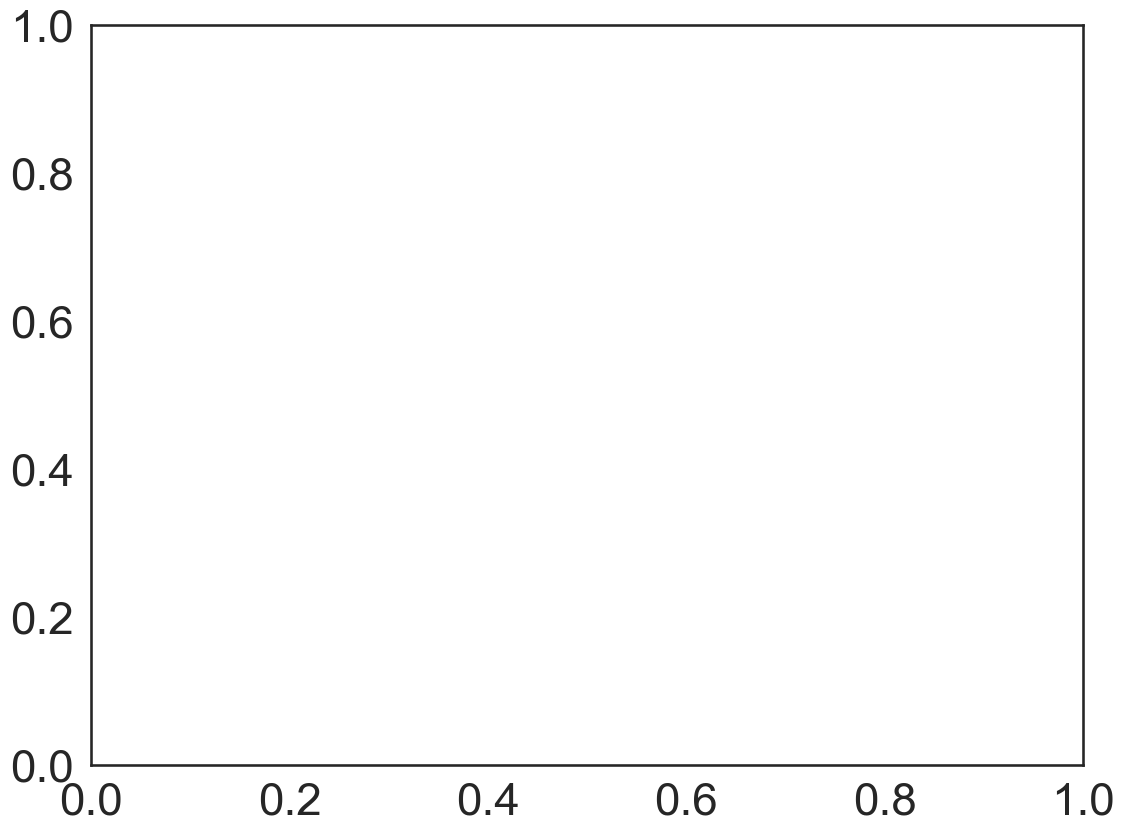

In [15]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
               "Restriction gas N1": os.path.join("eoles/outputs/0908_195504_uniform_S3_N1_restrictiongas_cc"),
               "Restriction gas N1nuc": os.path.join("eoles/outputs/0908_195621_uniform_S3_N1nuc_restrictiongas_cc"),
               "Restriction gas Opt": os.path.join("eoles/outputs/0908_195647_uniform_S3_Opt_restrictiongas_cc")
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0908_resirf_exogenous_cc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Restriction gas N1", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Restriction gas N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

# New version ResIRF

In [53]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Uniform": os.path.join("eoles/outputs/0910_S3_N1/0910_191912_uniform_S3_N1"),
               "Deep renovation": os.path.join("eoles/outputs/0910_S3_N1/0912_205131_DR_S3_N1"),
               "Insulation technical \n optimum": os.path.join("eoles/outputs/0910_S3_N1/0910_122544_centralized_insulation_S3_N1")
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0910_S3_N1")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Uniform", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Uniform")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [54]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Uniform": os.path.join("eoles/outputs/0910_S3_N1_noHC/0912_190000_uniform_S3_N1_noHC"),
               "Deep renovation": os.path.join("eoles/outputs/0910_S3_N1_noHC/0912_190604_DR_S3_N1_noHC"),
               "Insulation technical \n optimum": os.path.join("eoles/outputs/0910_S3_N1_noHC/0912_112514_centralized_insulation_S3_N1_noHC")
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0910_S3_N1_noHC")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Uniform", greenfield=False, health=False, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Uniform")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [55]:
vre_profiles_1 = pd.read_csv("eoles/inputs/hourly_profiles/vre_profiles_2006_2004.csv", index_col=0)
vre_profiles_2 = pd.read_csv("eoles/inputs/hourly_profiles/vre_profiles_all_years.csv", index_col=0)
vre_profiles_3 = pd.read_csv("eoles/inputs/hourly_profiles/vre_profiles_19y.csv", index_col=0)
vre_profiles_1 = vre_profiles_1.rename(columns={"0": "hour"})
vre_profiles_2 = vre_profiles_2.rename(columns={"0": "hour"})
vre_profiles_3 = vre_profiles_3.rename(columns={"0": "hour"})

In [165]:
vre_profiles_1.shape[0] / 8760 / 6

1.9999809741248098

In [161]:
vre_profiles_3

,hour,0.8000627431224356
river,,
river,1,0.800063
river,2,0.800063
river,3,0.800063
river,4,0.800063
river,5,0.800063
...,...,...
pv_g,166435,0.000000
pv_g,166436,0.000000
pv_g,166437,0.000000


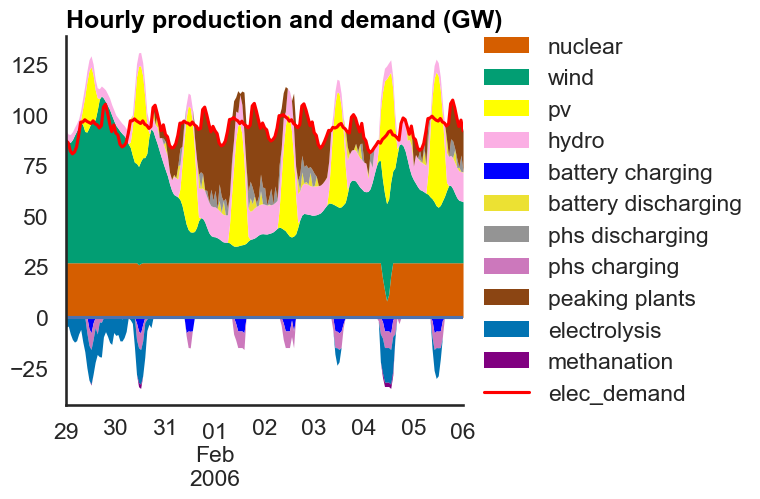

In [46]:
vre_profiles_1.loc[vre_profiles_1.index == 'river']

In [38]:
vre_profiles_3.loc[vre_profiles_3.index == 'river']

35003.99588994176

In [47]:
vre_profiles_3.index.unique()

0.14828365455640127


,offshore_f,offshore_g,onshore,pv_g,pv_c,river,lake,nuclear,phs,battery1,battery4,ocgt,ccgt,h2_ccgt,heat_elec,heat_gas,date,carbon_content,carbon_content_heat
0,28.181125,13.236686,31.469660,0.0,0.0,4.632353,0.0,23.359176,0.0,0.0,0.0,0.0,0.0,0.0,13.136986,20.424274,2006-01-01 00:00:00,0.0,0.0
1,29.091650,13.464000,32.466472,0.0,0.0,4.326097,0.0,20.059444,0.0,0.0,0.0,0.0,0.0,0.0,14.638356,22.758476,2006-01-01 01:00:00,0.0,0.0
2,29.437800,13.464000,33.085345,0.0,0.0,4.158524,0.0,14.446873,0.0,0.0,0.0,0.0,0.0,0.0,15.389041,23.925578,2006-01-01 02:00:00,0.0,0.0
3,29.430275,13.363457,33.306607,0.0,0.0,3.989987,0.0,12.296396,0.0,0.0,0.0,0.0,0.0,0.0,15.764383,24.509128,2006-01-01 03:00:00,0.0,0.0
4,29.106700,13.035600,33.132347,0.0,0.0,3.797373,0.0,12.074684,0.0,0.0,0.0,0.0,0.0,0.0,17.265753,26.843331,2006-01-01 04:00:00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,24.034850,14.978700,50.173948,0.0,0.0,2.831417,0.0,6.734924,0.0,0.0,0.0,0.0,0.0,0.0,8.927402,15.745736,2006-12-31 19:00:00,0.0,0.0
8756,24.080000,15.094543,50.400449,0.0,0.0,2.338327,0.0,8.003956,0.0,0.0,0.0,0.0,0.0,0.0,8.056436,14.209566,2006-12-31 20:00:00,0.0,0.0
8757,23.929500,15.151371,50.808722,0.0,0.0,1.955026,0.0,6.078335,0.0,0.0,0.0,0.0,0.0,0.0,7.403212,13.057439,2006-12-31 21:00:00,0.0,0.0
8758,23.666125,15.162300,50.751132,0.0,0.0,1.851978,0.0,2.909208,0.0,0.0,0.0,0.0,0.0,0.0,7.185470,12.673397,2006-12-31 22:00:00,0.0,0.0


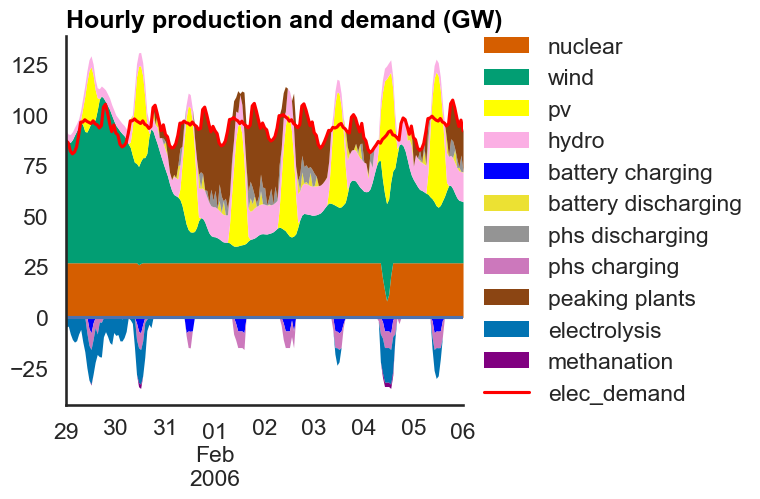

In [72]:
vre_profiles_3.drop(index=['onshore_V90', 'onshore_V110', 'pv_g_EW', 'pv_g_S', 'waste', 'small_hydro', 'geothermal_coge', 'biomass_coge']).to_csv('eoles/inputs/hourly_profiles/vre_profiles_19y.csv', header=False)

In [48]:
vre_profiles_2.loc[(vre_profiles_2.index == "offshore_g") & (vre_profiles_2.hour >= 8760*4)]

0.016916759837951892

In [68]:
vre_profiles_3.loc[(vre_profiles_3.index == "offshore_g") & (vre_profiles_3.hour >= 8760*4)]

0.14828365455640127


,offshore_f,offshore_g,onshore,pv_g,pv_c,river,lake,nuclear,phs,battery1,battery4,ocgt,ccgt,h2_ccgt,heat_elec,heat_gas,date,date_only,carbon_content,carbon_content_heat
0,28.181125,13.236686,31.469660,0.0,0.0,4.632353,0.0,23.359176,0.0,0.0,0.0,0.0,0.0,0.0,13.136986,20.424274,2006-01-01 00:00:00,2006-01-01,0.0,0.0
1,29.091650,13.464000,32.466472,0.0,0.0,4.326097,0.0,20.059444,0.0,0.0,0.0,0.0,0.0,0.0,14.638356,22.758476,2006-01-01 01:00:00,2006-01-01,0.0,0.0
2,29.437800,13.464000,33.085345,0.0,0.0,4.158524,0.0,14.446873,0.0,0.0,0.0,0.0,0.0,0.0,15.389041,23.925578,2006-01-01 02:00:00,2006-01-01,0.0,0.0
3,29.430275,13.363457,33.306607,0.0,0.0,3.989987,0.0,12.296396,0.0,0.0,0.0,0.0,0.0,0.0,15.764383,24.509128,2006-01-01 03:00:00,2006-01-01,0.0,0.0
4,29.106700,13.035600,33.132347,0.0,0.0,3.797373,0.0,12.074684,0.0,0.0,0.0,0.0,0.0,0.0,17.265753,26.843331,2006-01-01 04:00:00,2006-01-01,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,24.034850,14.978700,50.173948,0.0,0.0,2.831417,0.0,6.734924,0.0,0.0,0.0,0.0,0.0,0.0,8.927402,15.745736,2006-12-31 19:00:00,2006-12-31,0.0,0.0
8756,24.080000,15.094543,50.400449,0.0,0.0,2.338327,0.0,8.003956,0.0,0.0,0.0,0.0,0.0,0.0,8.056436,14.209566,2006-12-31 20:00:00,2006-12-31,0.0,0.0
8757,23.929500,15.151371,50.808722,0.0,0.0,1.955026,0.0,6.078335,0.0,0.0,0.0,0.0,0.0,0.0,7.403212,13.057439,2006-12-31 21:00:00,2006-12-31,0.0,0.0
8758,23.666125,15.162300,50.751132,0.0,0.0,1.851978,0.0,2.909208,0.0,0.0,0.0,0.0,0.0,0.0,7.185470,12.673397,2006-12-31 22:00:00,2006-12-31,0.0,0.0


In [69]:
vre_profiles_3.loc[(vre_profiles_3.index == "offshore_g") & (vre_profiles_3.hour >= 8760*4)]

0.016916759837951892

In [70]:
vre_profiles_3.loc[(vre_profiles_3.index == "river")]

0.016351174945841023

In [61]:
vre_profiles_3.drop(index=['onshore_V90', 'onshore_V110']).shape[0]/6

2.268707195133459e-06

In [104]:
19*8760

166440

In [83]:
vre_profiles_3.head()

,hour,value
tec,,
river,0,0.800063
river,1,0.800063
river,2,0.800063
river,3,0.800063
river,4,0.800063


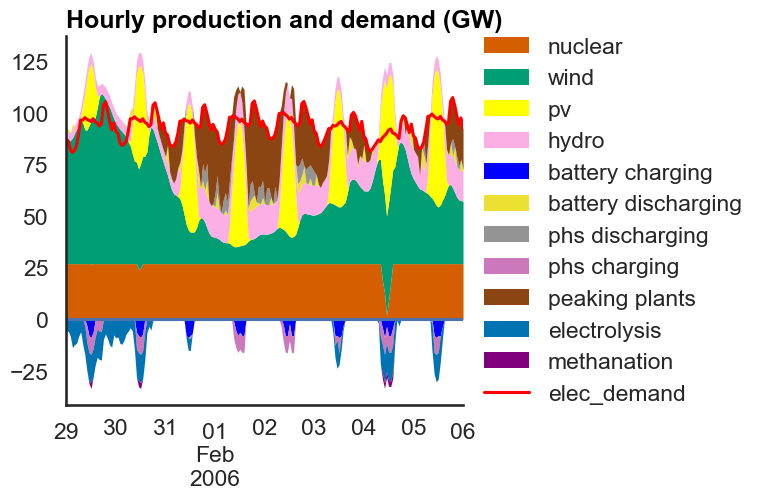

In [68]:
sns.set_theme(context="talk", style="white")
hourly_generation = pd.read_csv("eoles/outputs/0910_S3_N1/0910_191912_uniform_S3_N1/dataframes/hourly_generation_2050.csv", index_col=0)
hourly_generation = pd.read_csv("eoles/outputs/0918_policies_exogenous_scc/0918_161810_S3_N1_ref_scc/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006

date_start, date_end = datetime.datetime(2006, 1, 29, 0, 0), datetime.datetime(2006, 2, 6, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False)

<AxesSubplot:>

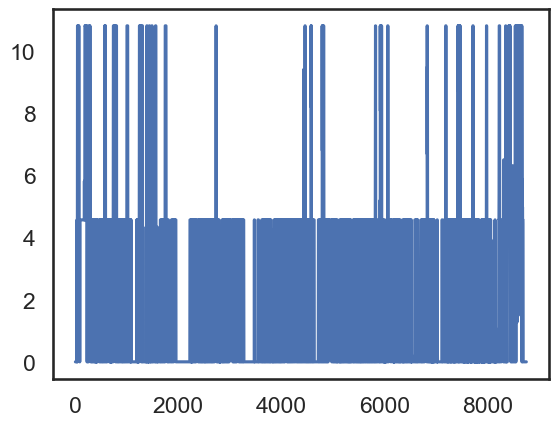

In [20]:
hourly_generation.hydrogen.plot()

<AxesSubplot:>

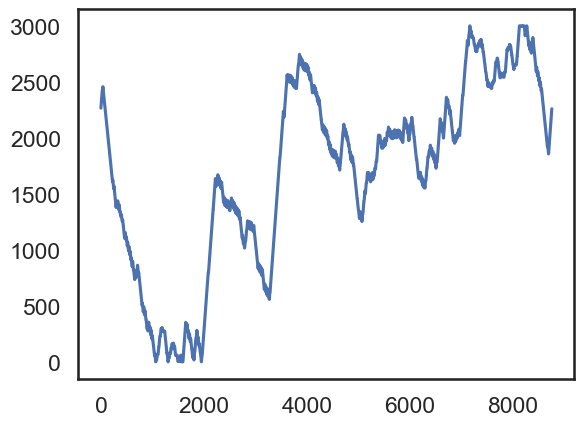

In [24]:
hourly_generation.hydrogen_charge.plot()

<AxesSubplot:>

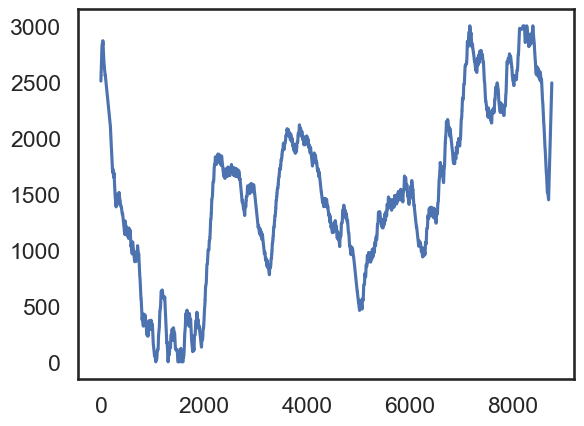

In [18]:
hourly_generation.hydrogen_charge.plot()

In [69]:
hourly_generation.hydrogen_in.describe()

count    8760.000000
mean        1.680003
std         2.716131
min         0.000000
25%         0.000000
50%         0.000000
75%         4.273475
max         6.400000
Name: hydrogen_in, dtype: float64

In [70]:
hourly_generation.hydrogen.describe()

count    8760.000000
mean        1.680003
std         2.304085
min         0.000000
25%         0.000000
50%         0.000000
75%         4.566210
max         7.743349
Name: hydrogen, dtype: float64

In [10]:
hourly_generation.hydrogen_charge.describe()

count    8760.000000
mean     1500.586786
std       758.722008
min         0.000000
25%      1015.922026
50%      1467.712700
75%      1993.975753
max      3000.000000
Name: hydrogen_charge, dtype: float64

In [14]:
hourly_generation["date"] = hourly_generation.apply(
    lambda row: datetime.datetime(2006, 1, 1, 0) + datetime.timedelta(hours=row["hour"]),
    axis=1)

hourly_generation.loc[hourly_generation.hydrogen_in > 10]

,hour,demand,offshore_f,offshore_g,onshore,pv_g,pv_c,river,lake,methanization,...,battery4_charge,hydrogen_charge,methane_charge,CTES_charge,elec_demand,CH4_demand,H2_demand,heat_elec,heat_gas,date
0,0,NaN,28.181125,13.236686,31.469660,0.0,0.0,4.632353,0.0,5.251741,...,41.716701,2507.197355,120164.591402,0.0,84.662641,14.616647,4.56621,16.180057,14.616647,2006-01-01 00:00:00
1,1,NaN,29.091650,13.464000,32.466472,0.0,0.0,4.326097,0.0,5.251741,...,31.826907,2523.834332,120158.008259,0.0,83.539083,16.287121,4.56621,18.029207,16.287121,2006-01-01 01:00:00
2,2,NaN,29.437800,13.464000,33.085345,0.0,0.0,4.158524,0.0,5.251741,...,25.044431,2540.471308,120158.008259,0.0,78.897852,17.122358,4.56621,18.953781,17.122358,2006-01-01 02:00:00
3,3,NaN,29.430275,13.363457,33.306607,0.0,0.0,3.989987,0.0,5.251741,...,24.677617,2557.108285,120158.008259,0.0,76.778977,17.539976,4.56621,19.416069,17.539976,2006-01-01 03:00:00
4,4,NaN,29.106700,13.035600,33.132347,0.0,0.0,3.797373,0.0,5.251741,...,24.677617,2573.745261,120147.118364,0.0,75.886739,19.210450,4.56621,21.265218,19.210450,2006-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,NaN,24.034850,14.978700,50.173948,0.0,0.0,2.831417,0.0,5.251741,...,41.716701,2424.012473,120120.685000,0.0,81.548463,11.185869,4.56621,10.981456,11.185869,2006-12-31 19:00:00
8756,8756,NaN,24.080000,15.094543,50.400449,0.0,0.0,2.338327,0.0,5.251741,...,41.716701,2440.649450,120120.685000,0.0,82.511502,10.094565,4.56621,9.910095,10.094565,2006-12-31 20:00:00
8757,8757,NaN,23.929500,15.151371,50.808722,0.0,0.0,1.955026,0.0,5.251741,...,41.716701,2457.286426,120120.685000,0.0,80.366886,9.276087,4.56621,9.106573,9.276087,2006-12-31 21:00:00
8758,8758,NaN,23.666125,15.162300,50.751132,0.0,0.0,1.851978,0.0,5.251741,...,41.716701,2473.923402,120120.501788,0.0,76.734575,9.003261,4.56621,8.838733,9.003261,2006-12-31 22:00:00


In [4]:
hourly_generation.hydrogen.describe()

count    8760.000000
mean        2.703797
std         2.886768
min         0.000000
25%         0.000000
50%         4.566210
75%         4.566210
max        10.807380
Name: hydrogen, dtype: float64

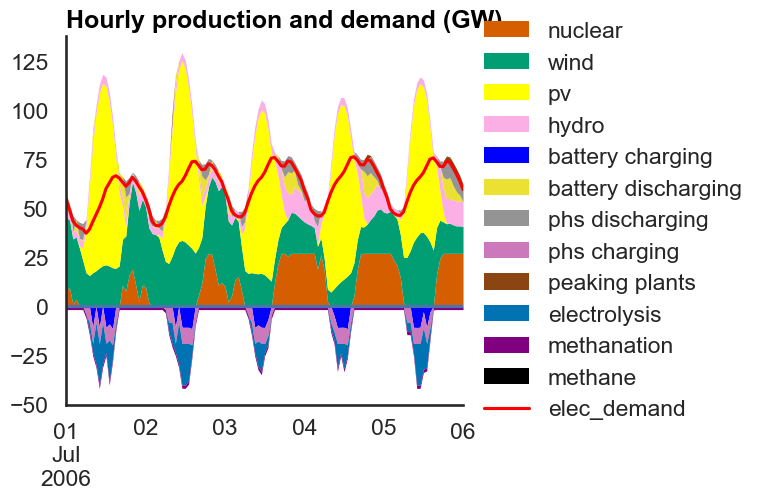

In [4]:
date_start, date_end = datetime.datetime(2006, 7, 1, 0, 0), datetime.datetime(2006, 7, 6, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None)

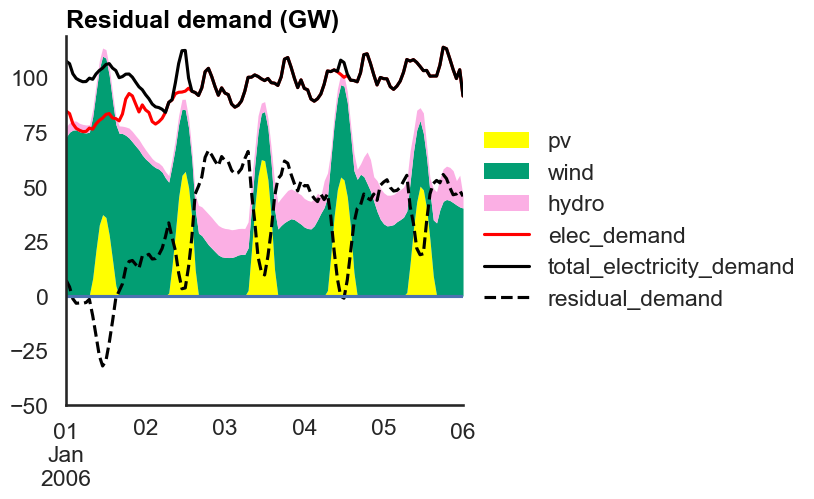

In [7]:
date_start, date_end = datetime.datetime(2006, 1, 1, 0, 0), datetime.datetime(2006, 1, 6, 0, 0)
plot_residual_demand(hourly_generation, date_start, date_end, climate, save_path=None, y_min=-50)

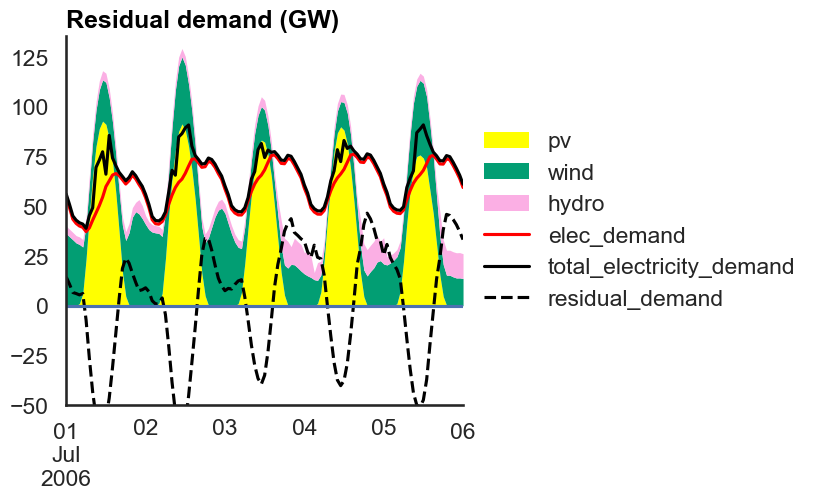

In [8]:
date_start, date_end = datetime.datetime(2006, 7, 1, 0, 0), datetime.datetime(2006, 7, 6, 0, 0)
plot_residual_demand(hourly_generation, date_start, date_end, climate, save_path=None, y_min=-50)

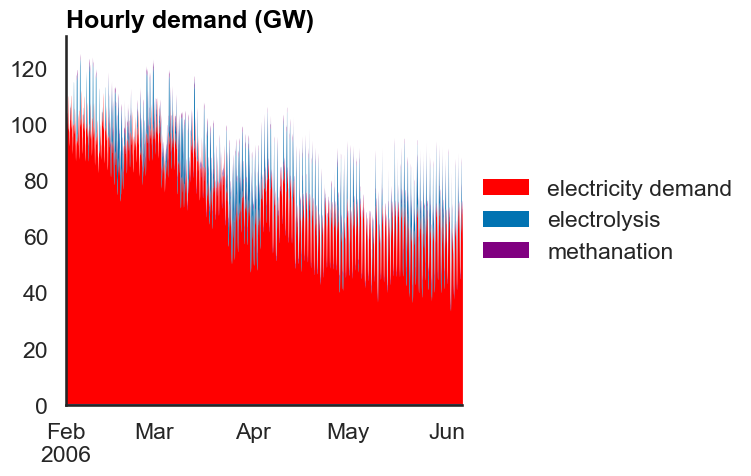

In [7]:
date_start, date_end = datetime.datetime(2006, 2, 1, 0, 0), datetime.datetime(2006, 6, 6, 0, 0)
plot_typical_demand(hourly_generation, date_start, date_end, climate, save_path=None)

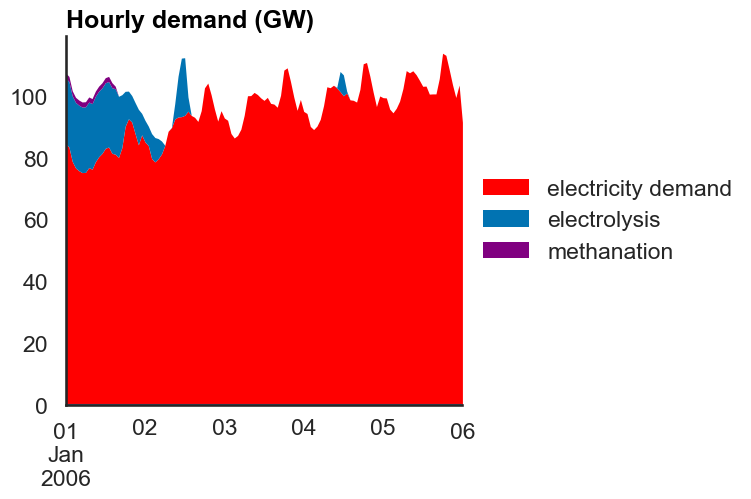

In [8]:
date_start, date_end = datetime.datetime(2006, 1, 1, 0, 0), datetime.datetime(2006, 1, 6, 0, 0)
plot_typical_demand(hourly_generation, date_start, date_end, climate, save_path=None)

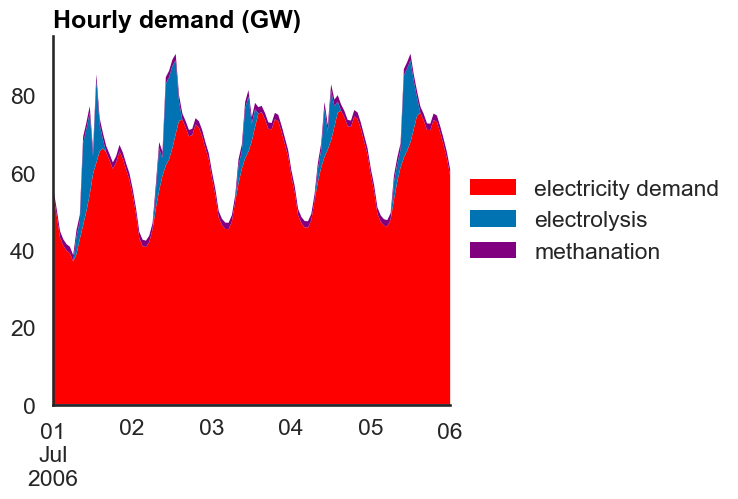

In [5]:
date_start, date_end = datetime.datetime(2006, 7, 1, 0, 0), datetime.datetime(2006, 7, 6, 0, 0)
plot_typical_demand(hourly_generation, date_start, date_end, climate, save_path=None)